In [8]:
'''
install the library to download and extract images from MNIST dataset
'''
# ! pip install get-mnist
# %pip install -U scikit-learn
%pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [61]:
def true_label(x):
    return label_names[x]

[MNIST] Caching data at FASHION_MNIST
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz in cache.
[MNIST] Found http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz in cache.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

this image is a : Sandal


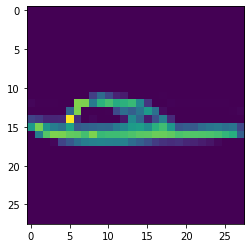

In [62]:
'''
load the dataset
x, y: images and labels for training phase
x_test, y_test: images and label for test phase
'''
import matplotlib.pyplot as plt
from mnist import fashion_mnist
x, y, x_test, y_test = fashion_mnist('FASHION_MNIST')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)
print('labels:', label_names)


example = 30
g = plt.imshow(x[example])
print('\nthis image is a : ' + true_label(y[example]))

In [63]:
print(x[0])
print(y[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 207. 178. 107. 156. 161. 109.  64.  23.  77. 1

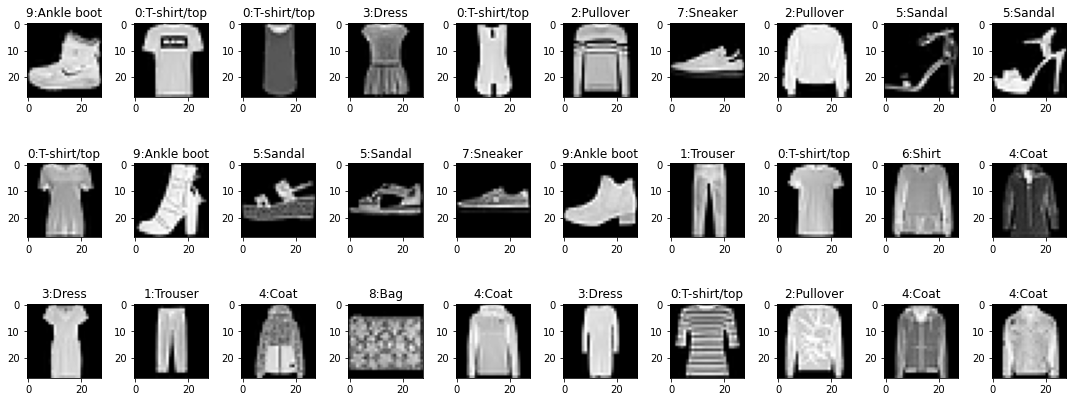

In [64]:
'''
illustrate several images and corresponding labels in the training set
'''

import matplotlib.pyplot as plt

num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x[i], cmap='gray')
    ax.set_title('%d:%s'%(y[i], label_names[y[i]]))
plt.tight_layout()
plt.show()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

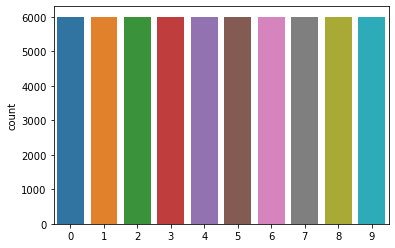

In [65]:
import seaborn as sns
import pandas as pd

df = pd.Series(y)

g = sns.countplot(df)

df.value_counts()

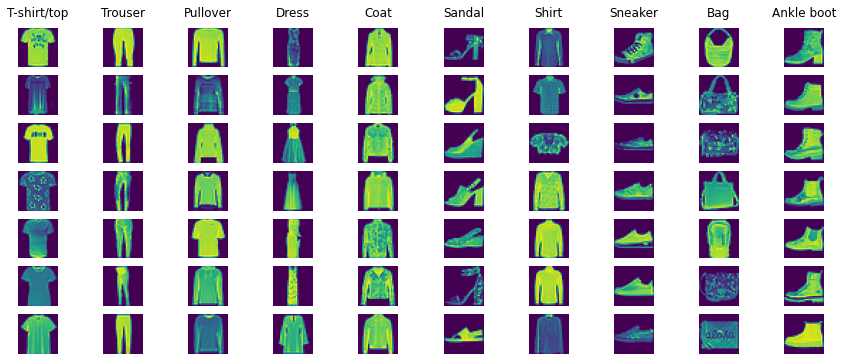

In [66]:
import numpy as np 

def visualize_sample(X_train, y_train, label_names, samples_per_class=7):
    """visualize some samples in the training datasets """ 
    fig, axes = plt.subplots(7, 10, figsize=(1.5*num_col,2*num_row)) # increase space between each image and title
    num_classes = len(label_names)
    for y, cls in enumerate(label_names):
        idxs = np.flatnonzero(y_train == y) # get all the indexes of cls
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs): # plot the image one by one
            plt_idx = i * num_classes + y + 1 # i*num_classes and y+1 determine the row and column respectively
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls, y=1.12)          
    plt.show()
    
visualize_sample(x, y, label_names)

In [67]:
import numpy as np
from keras.utils import to_categorical

num_px = x.shape[1]
x = np.array(x)
x_test = np.array(x_test)


x = (x.reshape(x.shape[0], -1).T) / 255
x_test = (x_test.reshape(x_test.shape[0], -1).T) / 255

y = to_categorical(y)
y_test = to_categorical(y_test)

print(y_test.shape)
print (y.shape)
print ("x's shape: " + str(x.shape))
print ("x_test's shape: " + str(x_test.shape))

(10000, 10)
(60000, 10)
x's shape: (784, 60000)
x_test's shape: (784, 10000)


In [104]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1))
    return sm

def initialize(dim1):
    w = np.zeros((dim1, 1))*0.01
    b = 0
    return w, b

In [105]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]  

    A = softmax((np.dot(w.T, X) + b))
    cost = (-1 / m) * np.sum(Y * np.log(A)) 
 
    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y))
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost

In [106]:
def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 50 == 0:
            costs.append(cost)


        if print_cost and i % 50 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [107]:
def predict(w, b, X):
    y_pred = np.argmax(softmax((np.dot(w.T, X) + b)), axis=1)
    return y_pred

In [118]:
def model(x, y, x_test, y_test, num_iters, alpha, print_cost):
    
    w, b = initialize(x.shape[0])
    parameters, grads, costs = optimize(w, b, x, y, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    y_prediction_train = predict(w, b, x)
    y_prediction_test = predict(w, b, x_test)
    
    y_prediction_train = to_categorical(y_prediction_train)
    y_prediction_test = to_categorical(y_prediction_test)

    print("Train accuracy: %.2f %%"% (100*np.mean(y_prediction_train == y)))
    print("Test accuracy: %.2f %%"% (100*np.mean(y_prediction_test == y_test)))
    

    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(d["learning_rate"]))
    plt.plot()
    plt.show()
    plt.close()

    return d

Cost after iteration 0: 11.002100
Cost after iteration 50: 10.992072
Cost after iteration 100: 10.982309
Cost after iteration 150: 10.972811
Cost after iteration 200: 10.963579
Cost after iteration 250: 10.954615
Cost after iteration 300: 10.945918
Cost after iteration 350: 10.937489
Cost after iteration 400: 10.929329
Cost after iteration 450: 10.921437
Cost after iteration 500: 10.913815
Cost after iteration 550: 10.906461
Cost after iteration 600: 10.899377
Cost after iteration 650: 10.892562
Cost after iteration 700: 10.886016
Cost after iteration 750: 10.879740
Cost after iteration 800: 10.873731
Cost after iteration 850: 10.867992
Cost after iteration 900: 10.862520
Cost after iteration 950: 10.857315
Cost after iteration 1000: 10.852378
Cost after iteration 1050: 10.847706
Cost after iteration 1100: 10.843300
Cost after iteration 1150: 10.839158
Cost after iteration 1200: 10.835280
Cost after iteration 1250: 10.831664
Cost after iteration 1300: 10.828310
Cost after iteration 135

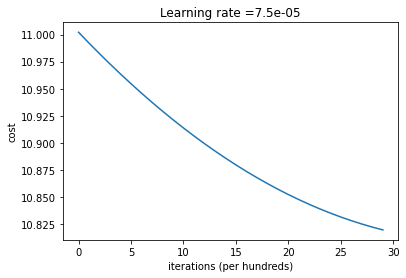

{'costs': [11.002099841204249,
  10.992071815008284,
  10.982308554773848,
  10.972810871844384,
  10.963579499899929,
  10.954615093601207,
  10.945918227355257,
  10.937489394207923,
  10.929329004867945,
  10.921437386867176,
  10.913814783860666,
  10.906461355070054,
  10.899377174872981,
  10.892562232540708,
  10.886016432125537,
  10.87973959249907,
  10.873731447541443,
  10.86799164648145,
  10.862519754386451,
  10.857315252800609,
  10.852377540529242,
  10.847705934566362,
  10.843299671162244,
  10.839157907026937,
  10.835279720665213,
  10.83166411383802,
  10.828310013145032,
  10.825216271722248,
  10.8223816710485,
  10.819804922854141],
 'Y_prediction_test': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'Y_prediction_train': array([[0., 0., 0., ..., 0.

In [120]:
model(x, y, x_test, y_test, num_iters = 1500, alpha = 0.000075, print_cost = True)